In [86]:
'''
====================================================
Applying the Kalman Filter with Missing Observations
====================================================
This example shows how one may apply :class:`KalmanFilter` when some
measurements are missing.
While the Kalman Filter and Kalman Smoother are typically presented assuming a
measurement exists for every time step, this is not always the case in reality.
:class:`KalmanFilter` is implemented to recognize masked portions of numpy
arrays as missing measurements.
The figure drawn illustrates the trajectory of each dimension of the true
state, the estimated state using all measurements, and the estimated state
using every fifth measurement.
'''
import numpy as np
import pylab as pl
from pykalman import KalmanFilter
import matplotlib.pyplot as plt

%pylab inline


Populating the interactive namespace from numpy and matplotlib


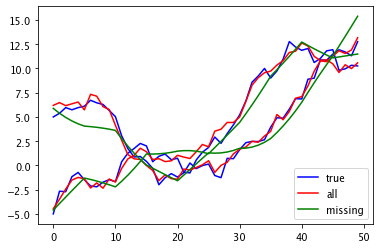

In [1]:

# specify parameters
random_state = np.random.RandomState(0)
transition_matrix = [[1, 0.1], [0, 1]]
transition_offset = [-0.1, 0.1]
observation_matrix = np.eye(2) + random_state.randn(2, 2) * 0.1
observation_offset = [1.0, -1.0]
initial_state_mean = [5, -5]
n_timesteps = 50

# sample from model
kf = KalmanFilter(
    transition_matrices=transition_matrix,
    observation_matrices=observation_matrix,
    transition_offsets=transition_offset,
    observation_offsets=observation_offset,
    initial_state_mean=initial_state_mean,
    random_state=0
)
states, observations_all = kf.sample(
    n_timesteps, initial_state=initial_state_mean
)

# label half of the observations as missing
observations_missing = np.ma.array(
    observations_all,
    mask=np.zeros(observations_all.shape)
)
for t in range(n_timesteps):
    if t % 5 != 0:
        observations_missing[t] = np.ma.masked

# estimate state with filtering and smoothing
smoothed_states_all = kf.smooth(observations_all)[0]
smoothed_states_missing = kf.smooth(observations_missing)[0]

# draw estimates
pl.figure()
lines_true = pl.plot(states, color='b')
lines_smooth_all = pl.plot(smoothed_states_all, color='r')
lines_smooth_missing = pl.plot(smoothed_states_missing, color='g')
pl.legend(
    (lines_true[0], lines_smooth_all[0], lines_smooth_missing[0]),
    ('true', 'all', 'missing'),
    loc='lower right'
)
pl.show()

fitted model: <pykalman.standard.KalmanFilter object at 0x130fccd30>


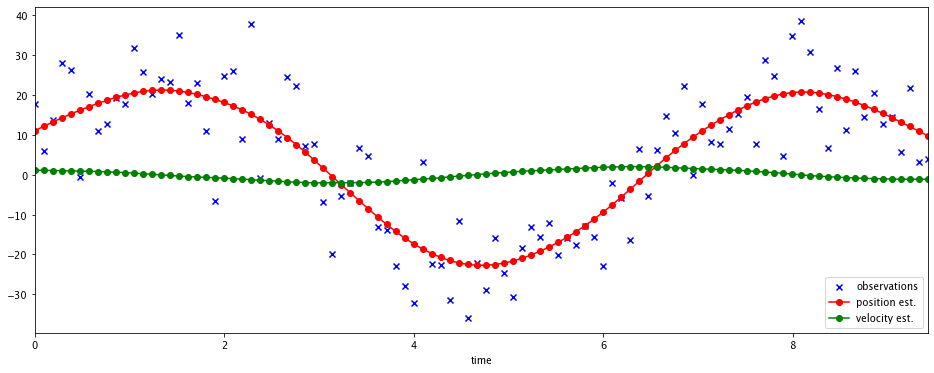

In [3]:
r'''
==================================
Kalman Filter tracking a sine wave
==================================
This example shows how to use the Kalman Filter for state estimation.
In this example, we generate a fake target trajectory using a sine wave.
Instead of observing those positions exactly, we observe the position plus some
random noise.  We then use a Kalman Filter to estimate the velocity of the
system as well.
The figure drawn illustrates the observations, and the position and velocity
estimates predicted by the Kalman Smoother.
'''
import numpy as np
import pylab as pl

from pykalman import KalmanFilter

rnd = np.random.RandomState(0)

# generate a noisy sine wave to act as our fake observations
n_timesteps = 100
x = np.linspace(0, 3 * np.pi, n_timesteps)
observations = 20 * (np.sin(x) + 0.5 * rnd.randn(n_timesteps))

# create a Kalman Filter by hinting at the size of the state and observation
# space.  If you already have good guesses for the initial parameters, put them
# in here.  The Kalman Filter will try to learn the values of all variables.
kf = KalmanFilter(transition_matrices=np.array([[1, 1], [0, 1]]),
                  transition_covariance=0.01 * np.eye(2))

# You can use the Kalman Filter immediately without fitting, but its estimates
# may not be as good as if you fit first.
states_pred = kf.em(observations).smooth(observations)[0]
print('fitted model: {0}'.format(kf))

# Plot lines for the observations without noise, the estimated position of the
# target before fitting, and the estimated position after fitting.
pl.figure(figsize=(16, 6))
obs_scatter = pl.scatter(x, observations, marker='x', color='b',
                         label='observations')
position_line = pl.plot(x, states_pred[:, 0],
                        linestyle='-', marker='o', color='r',
                        label='position est.')
velocity_line = pl.plot(x, states_pred[:, 1],
                        linestyle='-', marker='o', color='g',
                        label='velocity est.')
pl.legend(loc='lower right')
pl.xlim(xmin=0, xmax=x.max())
pl.xlabel('time')
pl.show()

In [5]:
observations.shape

(100,)

In [15]:
observations

array([ 1.76405235e+01,  5.90269295e+00,  1.35724047e+01,  2.80435831e+01,
        2.61088290e+01, -6.08248364e-01,  2.03137005e+01,  1.08496076e+01,
        1.27693917e+01,  1.92209765e+01,  1.77319548e+01,  3.18632431e+01,
        2.58030172e+01,  2.01167665e+01,  2.38748637e+01,  2.31331721e+01,
        3.49181375e+01,  1.79257641e+01,  2.29271059e+01,  1.08952740e+01,
       -6.62988178e+00,  2.47288259e+01,  2.59648701e+01,  8.86986884e+00,
        3.78125377e+01, -7.42076516e-01,  1.28207649e+01,  8.94097785e+00,
        2.44923226e+01,  2.21268368e+01,  7.18412539e+00,  7.56665008e+00,
       -6.97673661e+00, -1.98079647e+01, -5.38024236e+00, -2.22153520e+00,
        6.66825567e+00,  4.59054937e+00, -1.30377986e+01, -1.38358439e+01,
       -2.28487094e+01, -2.80017596e+01, -3.21776934e+01,  3.21623491e+00,
       -2.24170299e+01, -2.25733829e+01, -3.14279700e+01, -1.16613278e+01,
       -3.59354073e+01, -2.21047496e+01, -2.89320124e+01, -1.59274039e+01,
       -2.45442827e+01, -

### Create KF for inventory levels

In [19]:
## Test on some noisy inventory levels

In [60]:
n_obs = 50
inventory_levels =np.array( [np.random.randint(10)/(np.random.randint(5)+1) for _ in range(n_obs)] ) # 15 days x, 10 measured inventory levels
x = np.array([i for i in range(len(inventory_levels))])

In [61]:
inventory_levels

array([2.        , 1.75      , 1.6       , 0.        , 1.        ,
       0.2       , 0.2       , 1.        , 1.8       , 1.        ,
       1.8       , 4.        , 2.        , 2.        , 2.25      ,
       2.        , 1.        , 1.66666667, 0.        , 1.        ,
       2.5       , 1.        , 3.5       , 3.        , 5.        ,
       2.        , 1.66666667, 0.75      , 0.        , 4.5       ,
       3.        , 0.66666667, 3.        , 0.2       , 1.25      ,
       1.25      , 2.        , 1.25      , 0.66666667, 1.2       ,
       0.        , 0.        , 0.4       , 0.6       , 1.        ,
       0.        , 0.        , 0.        , 0.6       , 0.        ])

In [62]:
inventory_levels

array([2.        , 1.75      , 1.6       , 0.        , 1.        ,
       0.2       , 0.2       , 1.        , 1.8       , 1.        ,
       1.8       , 4.        , 2.        , 2.        , 2.25      ,
       2.        , 1.        , 1.66666667, 0.        , 1.        ,
       2.5       , 1.        , 3.5       , 3.        , 5.        ,
       2.        , 1.66666667, 0.75      , 0.        , 4.5       ,
       3.        , 0.66666667, 3.        , 0.2       , 1.25      ,
       1.25      , 2.        , 1.25      , 0.66666667, 1.2       ,
       0.        , 0.        , 0.4       , 0.6       , 1.        ,
       0.        , 0.        , 0.        , 0.6       , 0.        ])

In [63]:
inventory_levels.shape

(50,)

In [64]:
np.eye(inventory_levels.shape[0])

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [65]:
# create a Kalman Filter by hinting at the size of the state and observation
# space.  If you already have good guesses for the initial parameters, put them
# in here.  The Kalman Filter will try to learn the values of all variables.
kf = KalmanFilter(transition_matrices=np.eye(inventory_levels.shape[0]),
                  transition_covariance=0.01 * np.eye(inventory_levels.shape[0]))

In [66]:
# You can use the Kalman Filter immediately without fitting, but its estimates
# may not be as good as if you fit first.
states_pred = kf.em(inventory_levels).smooth(inventory_levels)[0]
print('fitted model: {0}'.format(kf))

fitted model: <pykalman.standard.KalmanFilter object at 0x133e09910>


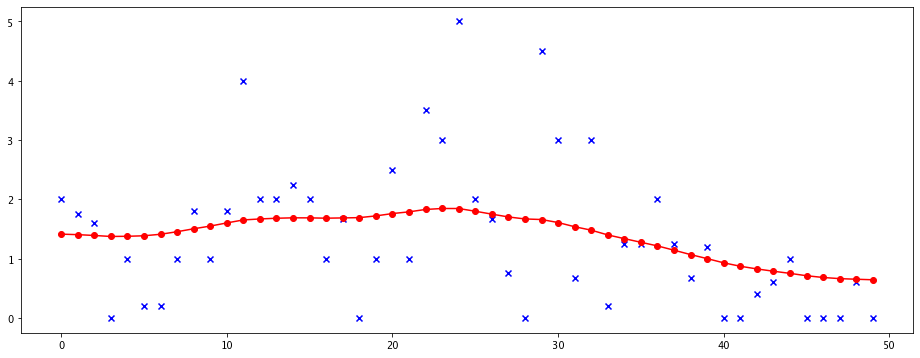

In [67]:
pl.figure(figsize=(16, 6))
obs_scatter = pl.scatter(x, inventory_levels, marker='x', color='b',
                         label='inventory_levels')
position_line = pl.plot(x, states_pred[:, 0],
                        linestyle='-', marker='o', color='r',
                        label='position est.')

In [73]:
states_pred[:, 0]

array([1.41382602, 1.40503728, 1.39127667, 1.37450778, 1.37754937,
       1.3860325 , 1.41160966, 1.45464949, 1.50424208, 1.54957198,
       1.60282275, 1.65323163, 1.66981706, 1.68164362, 1.68888178,
       1.68803267, 1.68268724, 1.68718124, 1.6919709 , 1.72114658,
       1.76071599, 1.78963026, 1.82992529, 1.84614991, 1.84574432,
       1.79987713, 1.75112562, 1.70359139, 1.66980107, 1.66007723,
       1.60942219, 1.53872506, 1.48059672, 1.40056955, 1.33784592,
       1.2763884 , 1.21531121, 1.14292447, 1.06899448, 1.00086314,
       0.92986169, 0.87226214, 0.82723431, 0.78836412, 0.75220879,
       0.71248209, 0.68302424, 0.66341067, 0.6533587 , 0.64407577])

In [74]:
## 2d Kalman Filter

In [75]:
kf = KalmanFilter(initial_state_mean=0, n_dim_obs=2)

In [108]:
test_x = np.random.randint(15, size=(10,2))

In [109]:
test_x

array([[ 8, 11],
       [ 7,  6],
       [ 1,  2],
       [ 8,  0],
       [ 0,  6],
       [ 2,  3],
       [ 3,  7],
       [ 0,  9],
       [11, 12],
       [ 9,  5]])

In [110]:
states_pred = kf.em(test_x).smooth(test_x) # [0]

ValueError: array must not contain infs or NaNs

In [104]:
test_x

array([[ 5,  5],
       [ 5, 14],
       [11,  5],
       [ 0,  8],
       [ 3,  5],
       [ 9,  6],
       [12, 11],
       [ 9, 12],
       [ 9, 12],
       [ 4,  0]])

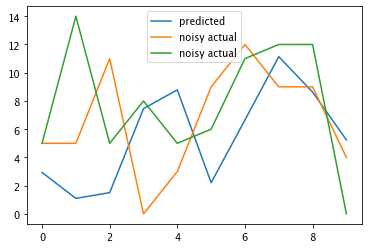

In [105]:
plt.plot(states_pred, label='predicted')
plt.plot(test_x, label='noisy actual')
plt.legend()